In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


In [4]:
df=pd.read_csv("DataSet.txt")
df.head()
df.rename(columns={"M":"sex","0.455":"Length","0.365":"Diameter","0.095":"Height","0.514":"whole weight","0.2245":"shucked weight","0.101":"Viscera weight","0.15":"shell weight","15":"Rings"},inplace=True)
df

,sex,Length,Diameter,Height,whole weight,shucked weight,Viscera weight,shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
#X=df[["sex","Length","Diameter","Height","whole weight","shucked weight","Viscera weight","shell weight"]].values
#abels=["Teenager","adults","old"]
#cut=[0,9,18,29]
#df["age"]=pd.cut(df["Rings"],bins=cut,labels=labels)
#y=df["age"]
#df.head()

In [19]:
X=df[["sex","Length","Diameter","Height","whole weight","shucked weight","Viscera weight","shell weight",]].values
y=df[["Rings"]]

In [7]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['M','F','I'])
X[:,0]=le_sex.transform(X[:,0])
X[0:5]

array([[2, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07],
       [0, 0.53, 0.42, 0.135, 0.677, 0.2565, 0.1415, 0.21],
       [2, 0.44, 0.365, 0.125, 0.516, 0.2155, 0.114, 0.155],
       [1, 0.33, 0.255, 0.08, 0.205, 0.0895, 0.0395, 0.055],
       [1, 0.425, 0.3, 0.095, 0.3515, 0.141, 0.0775, 0.12]], dtype=object)

In [8]:
from sklearn.cluster import KMeans 
clusterNum = 3
k_means = KMeans(n_clusters = clusterNum)
label=k_means.fit_predict(X)
label



D:\python-env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 0, ..., 0, 1, 0])

In [9]:
df["Cluster"] =label

(array([ 72., 428., 503., 208., 108.,  78.,  27.,   9.,   4.,   2.]),
 array([ 5. ,  7.2,  9.4, 11.6, 13.8, 16. , 18.2, 20.4, 22.6, 24.8, 27. ]),
 <BarContainer object of 10 artists>)

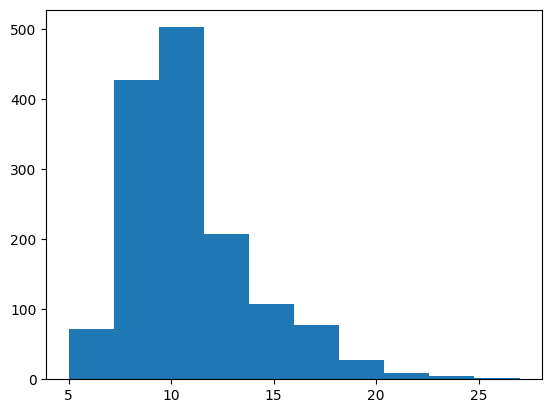

In [22]:
sample=X[label==0,:]


plt.hist(y[label==0])



(array([ 63., 360., 576., 144.,  71.,  60.,  19.,  10.,   1.,   2.]),
 array([ 5. ,  7.4,  9.8, 12.2, 14.6, 17. , 19.4, 21.8, 24.2, 26.6, 29. ]),
 <BarContainer object of 10 artists>)

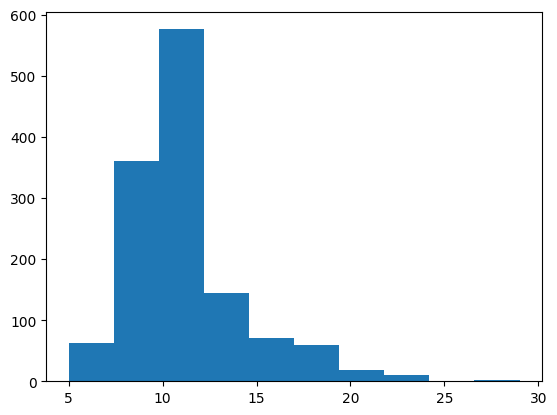

In [20]:
sample=X[label==1,:]


plt.hist(y[label==1])



(array([  2.,  72., 343., 570., 289.,  89.,  38.,  14.,   9.,   5.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

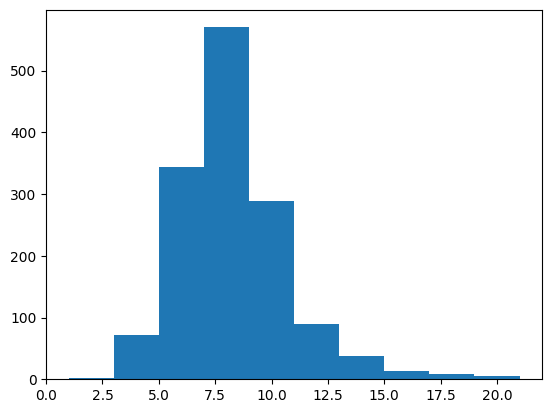

In [21]:
sample=X[label==2,:]


plt.hist(y[label==2])

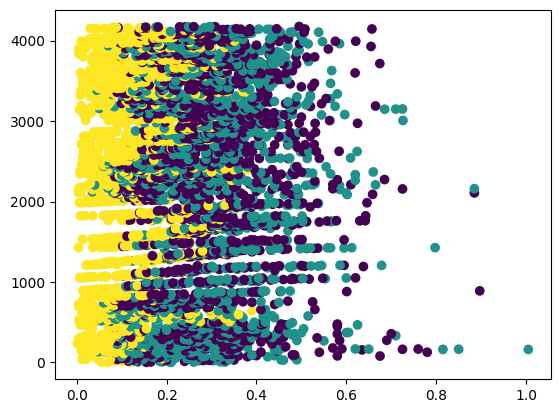

In [17]:
y=np.arange(0,4176,1)
plt.scatter(X[:, 7],y,c=label)
plt.show()
